In [1]:
%run func.ipynb

In [2]:
import numpy as np
import pandas as pd
import math
from skimage.io import imread
from skimage import io
from skimage.color import rgb2gray
import imageio
import skimage
import cv2
import glob
import os
from matplotlib import pyplot as plt
import mahotas
from pyfeats import *
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split
from skimage import io, color, img_as_ubyte
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [3]:
def load_image(arr):
    strr = "gambarsidikjari/*.bmp"
    for file in glob.glob(strr):
        img=cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        arr.append(img)
    return arr

In [4]:
data=[]
data=load_image(data)
print('total image: ',len(data))

total image:  100


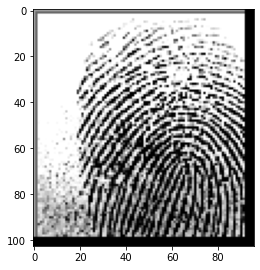

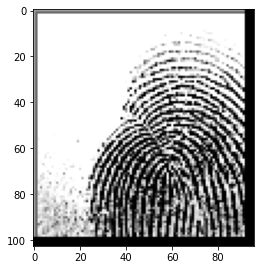

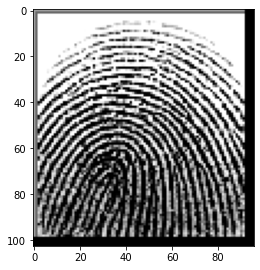

In [5]:
for i, image in enumerate(data):
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(4,2,2)
    ax1.imshow(image, cmap=plt.cm.gray)
    if i == 2:
        break

In [6]:
print(data[0])

[[160 160 160 ...   0   0   0]
 [160 105 105 ...   0   0   0]
 [160 105 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [7]:
# get the shape of the array
rows, cols = data[3].shape

# print the length of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", cols)

Number of Rows: 103
Number of Columns: 96


In [8]:
for image in data:
    mask = np.ones(image.shape)

In [9]:
df = feature_extraction(data)

target_list = []
for i in range(20):
  for j in range(5):
    target_list.append(j+1)

df['Target'] = target_list

In [10]:
df.head()

Mean      Variance  Median   Mode  Skewness  Kurtosis  \
Image_1  152.446120  10519.917129   185.0  255.0 -0.448559  1.541112   
Image_2  164.632274  10867.792041   220.0  255.0 -0.632901  1.674024   
Image_3  127.570227  10963.166831   133.0    0.0 -0.030917  1.332301   
Image_4  133.592944  10393.465348   151.0  255.0 -0.142980  1.395373   
Image_5  154.199530  10379.337585   189.0  255.0 -0.482152  1.580665   

           Energy  EntropyFOS  MinimalGrayLevel  MaximalGrayLevel  ...  \
Image_1  0.112145    3.886009               0.0             255.0  ...   
Image_2  0.185741    3.347604               0.0             255.0  ...   
Image_3  0.103204    3.948212               0.0             255.0  ...   
Image_4  0.087368    4.130406               0.0             255.0  ...   
Image_5  0.107202    3.939134               0.0             255.0  ...   

         SumAverage   SumVariance  SumEntropy  EntropyGLCM  \
Image_1  378.961310  17978.482526    7.026904     9.521569   
Image_2  405.111014  18233.198107    5.703622     7.471341   
Image_3  345.618017  20659.887617    7.440459    10.069340   
Image_4  344.503904  19971.467290    7.523537    10.391891   
Image_5  376.630395  17469.220331    7.182256     9.766996   

         DifferenceVariance  DifferenceEntropy  Information1  Information2  \
Image_1            0.000325           6.212765     -0.334840      0.988978   
Image_2            0.000813           5.052027     -0.393346      0.986913   
Image_3            0.000228           6.597364     -0.342323      0.992020   
Image_4            0.000213           6.600903     -0.348631      0.993648   
Image_5            0.000279           6.373085     -0.320211      0.987256   

         MaximalCorrelationCoefficient  Target  
Image_1                       2.093801       1  
Image_2                       2.220650       2  
Image_3                       2.247461       3  
Image_4                       2.251734       4  
Image_5                       2.058490       5  

[5 rows x 31 columns]

In [114]:
df = pd.read_csv('extraksiSidikJari.csv')

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Scale train sets with StandardScaler
X_std = StandardScaler().fit_transform(X)

# 
X_minmax = MinMaxScaler().fit_transform(X)

# ReliefF

In [38]:
!pip install skrebate

  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29260 sha256=1415cb8ce3d2482efd4520588f2aa8eecf8adf3e51a6a8b2d544f19e09b65cfe
  Stored in directory: c:\users\agung\appdata\local\pip\cache\wheels\1e\93\22\f83048fc1dafedcec44bb4ccf8d08225da96d20115d97a7a77
Successfully built skrebate


In [66]:
df.head()

mu  varians_n    deviasi  skewness    energi   entropi  smoothness  \
0  145.878641   0.028206  42.826449  2.317846  0.114321  5.502868    0.027432   
1  157.544397   0.031288  45.105789  0.728292  0.186542  4.746257    0.030339   
2  122.033879   0.023271  38.899822  6.477194  0.107866  5.576895    0.022742   
3  127.809567   0.025716  40.892211  4.815160  0.090897  5.841717    0.025071   
4  147.561590   0.029471  43.776078  1.830432  0.109280  5.582667    0.028627   

       asm0      idm0       stdevy0  ...  entropi90  energy90    asm135  \
0  0.057637  0.332372   9836.113792  ...   6.289958  0.053554  0.040550   
1  0.138548  0.465802  10113.634109  ...   5.233408  0.129908  0.122249   
2  0.042778  0.307723  10333.147300  ...   6.473490  0.039466  0.029825   
3  0.042098  0.306074   9775.880965  ...   6.746558  0.033565  0.032915   
4  0.059552  0.352693   9695.617897  ...   6.583078  0.040549  0.028748   

     idm135   stdevy135  korelasi135    kontras135  entropi135  energy135  \
0  0.260301  9977.57043     0.000055  12312.538867    6.502044   0.040550   
1  0.414700  9977.57043     0.000055   9158.559511    5.368045   0.122249   
2  0.246460  9977.57043     0.000055  12070.446598    6.619654   0.029825   
3  0.256447  9977.57043     0.000055   9972.608595    6.751549   0.032915   
4  0.219472  9977.57043     0.000055  15205.186223    6.692705   0.028748   

   Target  
0       1  
1       2  
2       3  
3       4  
4       5  

[5 rows x 36 columns]

In [144]:
import numpy as np

def reliefF(X, y, k_neighbors=3):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    for i in range(n_samples):
        distances = np.sqrt(np.sum((X - X[i])**2, axis=1))
        nearest_indices = np.argsort(distances)[1:k_neighbors+1]
        nearest_same_class = nearest_indices[y[nearest_indices] == y[i]]
        nearest_diff_class = nearest_indices[y[nearest_indices] != y[i]]
        
        # Update feature weights
        if len(nearest_same_class) > 0:
            nearest_same_dist = distances[nearest_same_class]
            for j in range(n_features):
                weights[j] -= np.sum(np.abs(X[i, j] - X[nearest_same_class, j])) / (k_neighbors * np.mean(nearest_same_dist))
        
        if len(nearest_diff_class) > 0:
            nearest_diff_dist = distances[nearest_diff_class]
            for j in range(n_features):
                weights[j] += np.sum(np.abs(X[i, j] - X[nearest_diff_class, j])) / (k_neighbors * np.mean(nearest_diff_dist))
    
    return weights

feature_weights = reliefF(X, y)

combines = {'Features':df.iloc[:, :-1].columns, 'Weights':feature_weights}
weight_f = pd.DataFrame(combines)
weight_f.sort_values('Weights', ascending=False).head(100)


Features       Weights
32   kontras135  1.999524e+01
11     kontras0  1.784603e+01
18    kontras45  1.777476e+01
25    kontras90  1.497657e+01
23     stdevy90  9.879209e+00
16     stdevy45  9.495293e+00
9       stdevy0  9.309977e+00
0            mu  5.301213e-01
2       deviasi  1.269797e-01
3      skewness  8.677431e-02
19    entropi45  1.326752e-02
12     entropi0  1.326543e-02
33   entropi135  1.311540e-02
26    entropi90  1.303884e-02
5       entropi  1.058573e-02
15        idm45  1.555625e-03
22        idm90  1.538507e-03
8          idm0  1.501458e-03
29       idm135  1.476833e-03
7          asm0  1.012244e-03
13      energy0  1.012244e-03
4        energi  9.921027e-04
27     energy90  9.826963e-04
21        asm90  9.826963e-04
14        asm45  9.658351e-04
20     energy45  9.658351e-04
28       asm135  9.560838e-04
34    energy135  9.560838e-04
1     varians_n  1.536794e-04
6    smoothness  1.459934e-04
10    korelasi0  8.977028e-08
17   korelasi45  8.936354e-08
24   korelasi90  7.857765e-08
30    stdevy135  0.000000e+00
31  korelasi135  0.000000e+00

In [130]:
# Membaca data
X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1])

In [116]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

df = pd.read_csv('extraksiSidikJari.csv')
len_row, len_col = df.shape
df = df.iloc[:, 1:]

In [108]:
features, labels = df.drop('Target', axis=1).values, df['Target'].values

clf = make_pipeline(ReliefF(n_features_to_select=3, n_neighbors=100),
                    RandomForestClassifier(random_state = 42))

# Perform ReliefF feature selection
relieff = clf.named_steps['relieff']
relieff.fit(features, labels)
feature_weights = relieff.feature_importances_

featur_com = []
weight_com = []
# Print the feature weights for each feature
for feature, weight in zip(df.columns[:-1], feature_weights):
    featur_com.append(feature)
    weight_com.append(weight)

combines = {'Features':featur_com, 'Weights':weight_com}
weight_f = pd.DataFrame(combines)
weight_f.sort_values('Weights', ascending=False).head(100)

Features   Weights
25    kontras90  0.127920
24   korelasi90  0.121025
22        idm90  0.102247
19    entropi45  0.093947
26    entropi90  0.091061
15        idm45  0.088792
27     energy90  0.085137
21        asm90  0.085137
34    energy135  0.081866
28       asm135  0.081866
29       idm135  0.081674
5       entropi  0.078070
4        energi  0.077818
33   entropi135  0.077704
14        asm45  0.074215
20     energy45  0.074215
12     entropi0  0.071757
7          asm0  0.071022
13      energy0  0.071022
32   kontras135  0.062571
18    kontras45  0.060987
17   korelasi45  0.059501
8          idm0  0.056145
1     varians_n  0.052121
6    smoothness  0.050441
0            mu  0.046437
3      skewness  0.043569
2       deviasi  0.042775
11     kontras0  0.031009
10    korelasi0  0.026825
23     stdevy90  0.026013
16     stdevy45  0.021524
9       stdevy0  0.020707
30    stdevy135  0.000000
31  korelasi135  0.000000

In [145]:
import sklearn_relief as relief

# Load some data and put it in a numpy.array matrix
my_input_matrix = np.array(X)

# Load the label vector
my_label_vector = np.array(y)

r = relief.Relief(
    n_features=3 # Choose the best 3 features
) # Will run by default on all processors concurrently

my_transformed_matrix = r.fit_transform(
    my_input_matrix,
    my_label_vector
)

In [146]:
# Create a DataFrame with the feature names and rankings
results = pd.DataFrame({'ReliefF': X.columns, 'Weights': r.w_})

# Sort the DataFrame by the rankings
results = results.sort_values('Weights', ascending=False)

# Print the sorted DataFrame
results.head(5)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'